In [2]:
#Indiana University Applied Machine Learning, Spring 2017
#Laura Kahn Final Project
#April 30, 2017

#Code to compare the performance of SVM, Adaboost & Random Forest classifiers on 1996 adult income from Census data-
#want to predict whether a person makes >$50K in income based on one or more features.

#import libraries: dataframe manipulation, machine learning, os tools
import pandas as pd
from pandas import Series, DataFrame
import os
import csv
import matplotlib.pylab as plt
import scipy.stats as stats
import sklearn

In [3]:
#Change working directory to be the same as where the data set is located
os.chdir("C:/Users/lkahn/Documents/526-AppliedMachineLearning")

In [4]:
#Load the data
df = pd.read_csv("adult.csv")
#Delete rows with no values or ? in the cell
df_clean = df.dropna()

In [5]:
#Get summary statistics for the first five rows
df_clean.head(n=5)

,Age,Workclass,FnlWgt,Education,Education1,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours per week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
#data types for each feature/variable
df.dtypes

Age                int64
Workclass         object
FnlWgt             int64
Education         object
Education1         int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hours per week     int64
Native-country    object
Income            object
dtype: object

In [13]:
#Get summary statistics including mean, standard deviation, quartiles
df_clean.describe()

,Age,FnlWgt,Education1,Capital-gain,Capital-loss,Hours per week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,189778.366512,10.080679,1077.648844,87.303830,40.437456
std,13.640433,105549.977697,2.572720,7385.292085,402.960219,12.347429
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,117827.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,178356.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,237051.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,1484705.000000,16.000000,99999.000000,4356.000000,99.000000


In [14]:
#Summarize the data
import statsmodels.api as sm
df_clean.std()

Age                   13.640433
FnlWgt            105549.977697
Education1             2.572720
Capital-gain        7385.292085
Capital-loss         402.960219
Hours per week        12.347429
dtype: float64

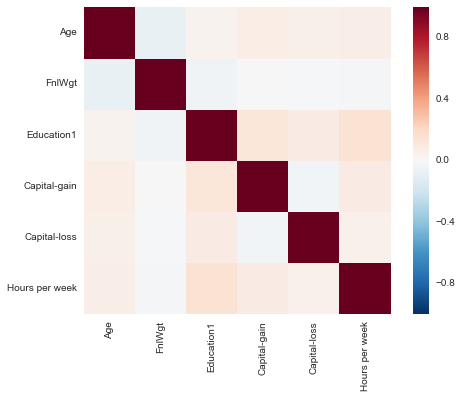

In [6]:
# Encode the categorical features as numbers
#Let's explore the correlation between the different features in the columns.
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn import preprocessing
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it as a heatmap
encoded_data, _ = number_encode_features(df_clean)
sns.heatmap(df.corr(), square=True)
plt.show()

In [7]:
#We need to preprocess the data to get rid of ? or non-numerical values
import pandas as pd
df_clean_no_missing = df.dropna()
df_clean_no_missing

,Age,Workclass,FnlWgt,Education,Education1,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours per week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [8]:
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics

#Define X, Y variables
X_train, X_test, y_train, y_test = cross_validation.train_test_split(encoded_data[encoded_data.columns - ["Income"]], 
    encoded_data["Income"], train_size=0.80)

#Let's scale the features with mean of 0 and variance of 1 using a Standard Scaler from scikit-learn
scaler = preprocessing.StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train.astype("float64")), columns=X_train.columns)
X_test = scaler.transform(X_test.astype("float64"))

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [12]:
#Let's look at how Linear Regression classifier does at predicting if income will be greater than $50K
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as linear_model

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
print(regr.coef_)

[ 0.06633656  0.06895266  0.04532431 -0.01363835  0.12276556  0.00751191
  0.04446586 -0.03636497 -0.00173986  0.00992533  0.01110167 -0.02310301
  0.04852311 -0.00616821]


In [15]:
#Now let's look at the mean square error of the linear regression model
np.mean((regr.predict(X_test)- y_test)**2)

0.1364678710032933

In [16]:
#Since a linear regression isn't the right approach since it gives too much weight to data far from the decision frontier,
#we will use Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Fit a Logistic Regression model to the data
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
print(logistic.coef_)

[[ 0.48114389  2.28327747  0.27101514  0.0659045   0.86867906  0.05349454
   0.37008715 -0.36105427  0.01872016  0.05381428  0.08358538 -0.17686004
   0.42735494 -0.03839024]]


In [17]:
#Now let's look at the mean square error of the logistic regression model
np.mean((logistic.predict(X_test)- y_test)**2)

0.17610931982189468

In [18]:
#Now let's look at accuracy of the Logistic Regression model
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, logistic.predict(X_test)))

0.823890680178


In [19]:
#Next, let's use a Multinomial Naive Bayes classifier for income prediction
#We need to represent X and Y as count vectors and are going to look at how well the feature 'Education' predicts 'Income'
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['Education'])
X.shape

(32561, 23)

In [20]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

y = df['Income']

from sklearn.cross_validation import cross_val_score
scores = cross_val_score(mnb, X, y, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.779583173343


In [22]:
#Now let's do a Decision Tree Classifier with depth of 3 and leaf size of 5
#We're going to try to hypertune the parameters by increasing the depth size to 5
from sklearn.tree import DecisionTreeClassifier

dt3 = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=5, min_samples_leaf=5)
dt3.fit(X_train, y_train)

#Now let's look at Decision Tree accuracy
#Now let's look at the accuracy of the Decision Tree Classifier
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt3, X_test, y_test, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.844623744354


In [24]:
#Now we're going to hypertune the cv parameter of the decision tree classifier to 5
from sklearn.tree import DecisionTreeClassifier

dt5 = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=5, min_samples_leaf=5)
dt5.fit(X_train, y_train)

#Now let's look at Decision Tree accuracy
#Now let's look at the accuracy of the Decision Tree Classifier
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt5, X_test, y_test, scoring="accuracy", cv=5)
print("Average accuracy, 5-fold cross validation:")
print(np.mean(scores))

#We can see that increasing the number of leaves has no effect, increasing the depth size has no effect on accuracy
#Decreasing the CV from 10 to 5 decreased the accuracy of the Decision Tree model

Average accuracy, 5-fold cross validation:
0.844157580345


In [25]:
#Next, we'll do a k-Nearest Neighbor model for income prediction 
from sklearn.neighbors import KNeighborsClassifier
kNN3 = KNeighborsClassifier(n_neighbors=3)

kNN3.fit(X_train, y_train)

#Now let's look at the accuracy of a KNN with k = 3
from sklearn.model_selection import cross_val_score
scores = cross_val_score(kNN3, X_test, y_test, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.800550868486


In [26]:
#Let's try to hypertune the k parameter of the K-Nearest Neighbor model to k=10 to see if we can get 
#better accuracy results 

from sklearn.neighbors import KNeighborsClassifier
kNN10 = KNeighborsClassifier(n_neighbors=10)

kNN10.fit(X_train, y_train)

#Now let's look at the accuracy of a KNN with k = 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(kNN10, X_test, y_test, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.820667184982


In [27]:
#Let's try to hypertune the k parameter to k=20 to see if we can get better accuracy results from our kNN model

from sklearn.neighbors import KNeighborsClassifier
kNN20 = KNeighborsClassifier(n_neighbors=20)

kNN20.fit(X_train, y_train)

#Now let's look at the accuracy of a KNN with k = 20
from sklearn.model_selection import cross_val_score
scores = cross_val_score(kNN20, X_test, y_test, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.820514518268


In [9]:
#Let's look at how Support Vector Machine classifier does at predicting if income >$50K
from sklearn import svm

svmcl#Let's try to hypertune the k parameter to k=20 to see if we can get better accuracy results from our kNN model

from sklearn.neighbors import KNeighborsClassifier
kNN20 = KNeighborsClassifier(n_neighbors=20)

kNN20.fit(X_train, y_train)

#Now let's look at the accuracy of a KNN with k = 20
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_test, y_test, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))f = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
svmclf.fit(X_train,y_train)

#Now let's look at accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svmclf, X_test, y_test, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.837711765179


In [21]:
#Now, let's try tuning the value of the "C" hyperparameter with C=5
#Remember that changing c may or may not produce a different hyperplane
from sklearn import svm

svmclf = svm.SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
svmclf.fit(X_train,y_train)

#Now let's look at accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svmclf, X_test, y_test, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.844774454518


In [34]:
#Now, let's try tuning the value of the "C" hyperparameter with C=10
#Remember that changing c may or may not produce a different hyperplane
from sklearn import svm

svmclf = svm.SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
svmclf.fit(X_train,y_train)

#Now let's look at accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svmclf, X_test, y_test, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.841398570029


In [23]:
#Next, let's do an Adaboost classifier with tree depth of 1
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200)
bdt.fit(X_train,y_train)

#Now let's look at accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(bdt, X_test, y_test, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.850604328187


In [24]:
#Now let's see what would happen if we change the tree depth of the Adaboost classifier to 5
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), algorithm="SAMME", n_estimators=200)
bdt.fit(X_train,y_train)

#Now let's look at accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(bdt, X_test, y_test, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.856132641618


In [30]:
#Now let's look at a Random Forest Classifier with tree depth of 1
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=1)
rf.fit(X_train,y_train)

#Now let's look at accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_test, y_test, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.765698734078


In [31]:
#Now let's look at a Random Forest Classifier with tree depth of 10
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=10)
rf.fit(X_train,y_train)

#Now let's look at accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_test, y_test, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.853525984999


In [32]:
#Now let's look at a Random Forest Classifier with tree depth of 20
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=20)
rf.fit(X_train,y_train)

#Now let's look at accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_test, y_test, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.847688800546


In [33]:
#Now let's look at a Random Forest Classifier with tree depth of 15
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=15)
rf.fit(X_train,y_train)

#Now let's look at accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_test, y_test, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.850450951779


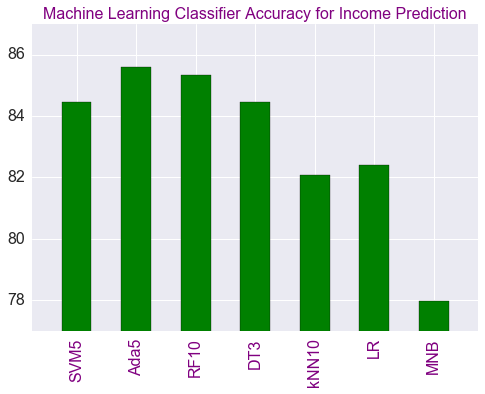

In [39]:
#Accuracy was used because it is the number of correct predictions made as a ratio of all predictions made.
#It is the most common evaluation metric for classification problems.

#Adaboost classifier with tree depth of 5 had the highest accuracy at .8561, then Random Forest with tree depth of 10 
# = 0.8535 accuracy, then SVM with C=5 had a 0.8447 accuracy, then Decision Tree with depth of 3 = 0.8446, then 
#Logistic Regression = 0.8239, then kNN10 = 0.8207, then Multinomial Naive Bayes = 0.7796.

#Each of the hyperparemeters C and tree depth were optimized for improved accuracy

#Next, we're going to plot the accuracies for each model for a visual comparison of the results.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

labels = ['SVM5', 'Ada5', 'RF10', 'DT3', 'kNN10', 'LR', 'MNB']
data = [84.47, 85.61, 85.35, 84.46, 82.07, 82.39, 77.96]

xlocations = np.array(range(len(data)))+0.5
width = 0.5
bar(xlocations, data, width=width, color='green')
yticks(fontsize=16)
xticks(xlocations+ width/2, labels, fontsize=16, rotation='vertical', color='purple')
xlim(0, xlocations[-1]+width*2)
ylim(77,87)

#Add title to plot
title('Machine Learning Classifier Accuracy for Income Prediction', fontsize=16, color='purple')

gca().get_xaxis().tick_bottom()
gca().get_yaxis().tick_left()
show()